## H-G phase function  @python 3.8


In [104]:
#import
import numpy as np
import matplotlib.pyplot as plt
import math as mh 
import pandas as pd
from tqdm import tqdm
import os
#constant
Fsun = 1367.5           # sun constant
sigma = 5.67E-8         #stefan-boltzmann constant
h = 6.626007015E-34     #plank constant
#q = 0.29+0.684*0.15    #phase integral = 0.29+0.684*G(=0.15)
epsi = 0.9              #radiance epsilon
kB = 1.38064852E-23     #boltzmann constant  j/k
cl = 299792458.0        #lightspeed m/s
au = 149597870700.0
pi = 3.1415926535
Rsun = 0.00465*au   #Rsun m
Tsun = 5778         #Tsun  K
eta_guess = [1.2,0.7]
D_guess = [400,200000]
logf_guess = [1,0.1,1]
eta_piror = [0.5,2.8]
D_piror = [0,2500000]
Hv = 8.61
G = 0.15

### Cal   $H(\alpha)$

In [97]:
A1,A2 = 3.332,1.862
B1,B2 = 0.631,1.218
C1,C2 = 0.986,0.238
def calW(alpha):
    return np.exp(-90.56*np.tan(alpha/2)**2)
def calphiiS(i,alpha):
    Ci = C1
    if i == 2 :
        Ci = C2
    aa = 0.119+1.341*np.sin(alpha)-0.754*np.sin(alpha)**2
    return 1-Ci*np.sin(alpha)/aa
def calphiiL(i,alpha):
    Ai = A1
    Bi = B1
    if i == 2 :
        Ai = A2
        Bi = B2
    return np.exp(-Ai*np.tan(alpha/2)**Bi)
def calphii(i,alpha):
    W = calW(alpha)
    return W*calphiiS(i,alpha)+(1-W)*calphiiL(i,alpha)
def calHalpha(alpha,G,H):
    aa = (1-G)*calphii(1,alpha)+G*calphii(2,alpha)
    return H - 2.5*np.log10(aa)
def calpromixHalpha(alpha,G,H):
    aa = (1-G)*calphiiL(1,alpha)+G*calphiiL(2,alpha)
    return H - 2.5*np.log10(aa)
    

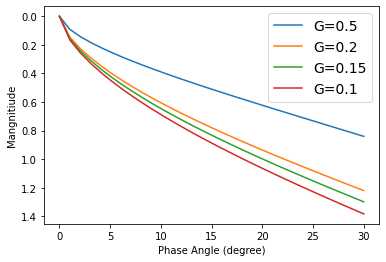

In [95]:
alpha_degree = np.linspace(0,30,30)
alpha = alpha_degree/180*np.pi
ax = plt.gca()
ax.invert_yaxis()
Hv = 0
plt.plot(alpha_degree,calpromixHalpha(alpha,0.5,Hv),label = 'G=0.5')
plt.plot(alpha_degree,calpromixHalpha(alpha,0.2,Hv),label = 'G=0.2')
plt.plot(alpha_degree,calpromixHalpha(alpha,0.15,Hv),label = 'G=0.15')
plt.plot(alpha_degree,calpromixHalpha(alpha,0.1,Hv),label = 'G=0.1')
plt.legend(fontsize=14)
plt.xlabel("Phase Angle (degree)")
plt.ylabel("Mangnitiude");


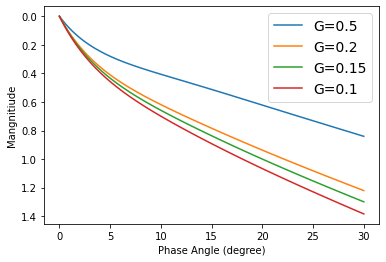

In [102]:
alpha_degree = np.linspace(0,30,100)
alpha = alpha_degree/180*np.pi
ax = plt.gca()
ax.invert_yaxis()
plt.plot(alpha_degree,calHalpha(alpha,0.5,Hv),label = 'G=0.5')
plt.plot(alpha_degree,calHalpha(alpha,0.2,Hv),label = 'G=0.2')
plt.plot(alpha_degree,calHalpha(alpha,0.15,Hv),label = 'G=0.15')
plt.plot(alpha_degree,calHalpha(alpha,0.1,Hv),label = 'G=0.1')
plt.legend(fontsize=14)
plt.xlabel("Phase Angle (degree)")
plt.ylabel("Mangnitiude");


## cal  $F_v^{ref}(\lambda)$

In [112]:
qG = 0.29+0.684*G
def calPlank(T,lamda):
    aa = np.exp(h*cl/(lamda*kB*T))-1
    return 1/(aa)
def calFsun(lamda,dd):
    return (Rsun/dd)**2*pi*calPlank(Tsun,lamda)
def calFref(lamda,D,delta,alpha,dd,epsiLamda):
    cons = (0.5*D/delta)**2*(1-epsiLamda)/qG
    Fref = cons*calpromixHalpha(alpha,G,Hv)*calFsun(lamda,dd)
    return Fref*(lamda)**2/cl*1e29
    

In [117]:
calFref(1.2e-6,2000,au,30/180*pi,au,0.9)

5.283329422484768e-13